# Grundlagen der Multimediatechnik
## Wintersemester 2021/2022

## Übungslatt 7
<b>Wichtig</b>: Bitte kennzeichnen Sie Ihre Abgabe mit Ihrem Namen und dem Namen Ihres Übungspartners. <br>
Laden Sie bitte Ihre Abgabe als PDF-/ZIP-Datei auf der ILIAS-Plattform hoch. Andere Dateiformate sowie Scans von handgeschriebenen Abgaben werden nicht gewertet. Achten Sie darauf, nur kompilierbaren, kommentierten Code abzugeben. Nicht-kompilierbarer Code wird mit <b>0 Punkten</b> bewertet! <br>
Alle Abgaben müussen folgender Namenskonvention entsprechen:  `gmt_uebungXX_nachname1_nachname2.format` <br>
Im Falle Ihres Notebooks: `gmt_uebungXX_nachname1_nachmame2.ipynb`

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

### Aufgabe 2 - Fourier-Transformation (13 Punkte)
Auf dem letzten Übungsblatt haben Sie gelernt, wie man eine Faltung im Ortsraum durchführt. In dieser Übung wird die Faltung im Frequenzraum behandelt. Hierfür sei folgende Funktion gegeben:
$$f(x) = \sin(x).$$
1. Plotten Sie die gegebene Funktion.

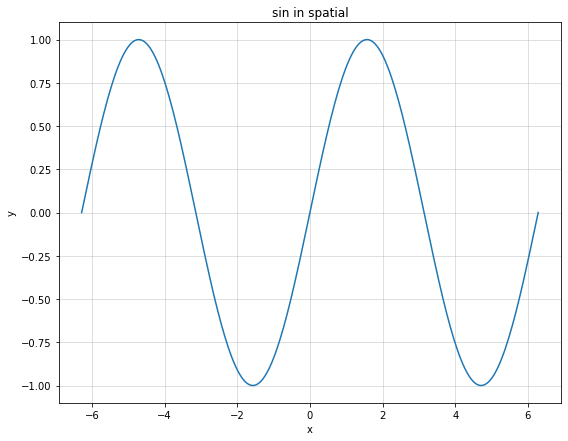

In [2]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 250)
f_sin = np.sin(x)
N = x.size
# TODO - plot sin function
def plotSpatial(x,f,title):
    plt.figure(figsize=(9, 7))

    plt.plot(x, f)

    plt.grid(alpha=0.5)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)

plotSpatial(x,f_sin,"sin in spatial")

2. Die Diskrete Fourier-Transformation ist eine Transformation aus der Fourier-Analysis, die ein zeitdiskretes Signal auf ein diskretes, periodisches Frequenzspektrum abbildet [[1]](https://de.wikipedia.org/wiki/Diskrete_Fourier-Transformation). <br>
   (a) Implementieren Sie die [Diskrete Fourier Transformation](https://de.wikipedia.org/wiki/Diskrete_Fourier-Transformation#Diskrete_Fourier-Transformation_(DFT)) (DFT) und wenden Sie diese auf die gegebene Funktion an. Plotten Sie das Ergebnis. <br>
**Hinweis:**
- Komplexe Zahlen werden in `numpy` durch den Datentyp `np.complex128` dargestellt.
- Sie können auf den Imaginärteil mit `np.imag()` und auf den Realteil mit `np.real()` zugreifen.
- Benutzen Sie **nicht** die Funktionen `np.fft.fft()` und `np.fft.ifft()`aus der `numpy` Bibliothek! Funktionen, die unter [Helper routines](https://numpy.org/doc/stable/reference/routines.fft.html#helper-routines) aufgelistet sind, sind gestattet.

In [3]:
def discrete_fourier_transform(f): 
    # TODO - implement DFT
    dft = np.zeros(f_sin.shape, dtype=np.complex128)

    for k in range(N-1):
        for l in range(N-1):
            e = np.exp( -( 1j * 2 * np.pi * (k * l)/N) )
            dft[k] = dft[k] + e * f[l]

    return dft

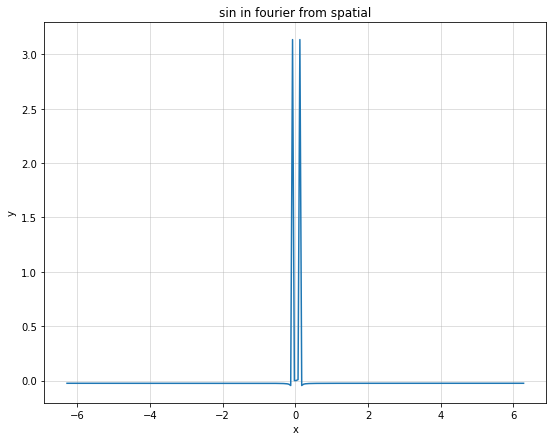

In [4]:
# TODO - plot
def plotDft(x, dft, title):

    f = np.fft.fftshift(dft)

    plt.figure(figsize=(9, 7))

    plt.plot(x,np.real(f))

    plt.grid(alpha=0.5)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)

dft = discrete_fourier_transform(f_sin)
# dft =  np.fft.fft(f_sin)

plotDft(x, dft, "sin in fourier from spatial")



   (b) Implementieren Sie die [inverse Diskrete Fourier Transformation](https://de.wikipedia.org/wiki/Diskrete_Fourier-Transformation#Inverse_Diskrete_Fourier-Transformation_(iDFT)) (iDFT), die ein periodisches Frequenzspektrum rücktransformiert. Wenden Sie diese auf die fouriertransformierte Funktion aus (a) an. Plotten Sie hier ebenfalls das Resultat.

In [5]:
def inverse_discrete_fourier_transform(f):
    # TODO - implement IDFT
    idft = np.zeros(f_sin.shape, dtype=np.complex128)

    for k in range(N-1):
        for l in range(N-1):
            e = np.exp( ( 1j * 2 * np.pi * (k * l)/N) )
            idft[k] = idft[k] + e * f[l]
        idft[k] = idft[k]/N

    return idft

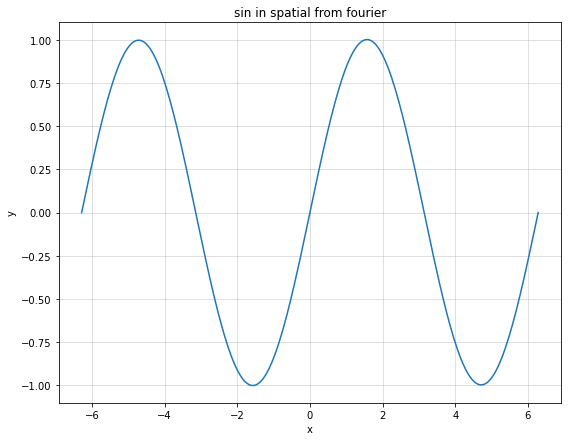

In [6]:
# TODO - plot

idft = inverse_discrete_fourier_transform(dft)
# idft =  np.fft.ifft(dft_sol)

plotSpatial(x, np.real(idft), "sin in spatial from fourier")

3. Sei nun ein verrauschtes Signal gegeben.

In [7]:
# create noisy signal

f_noise = f_sin + (-0.1 + (np.random.rand(N) * 0.2))      # add random noise

(a) Plotten Sie das verrauschte Signal. Wenden Sie anschließend die Fouriertransformation auf dieses an und plotten Sie das Ergebnis.

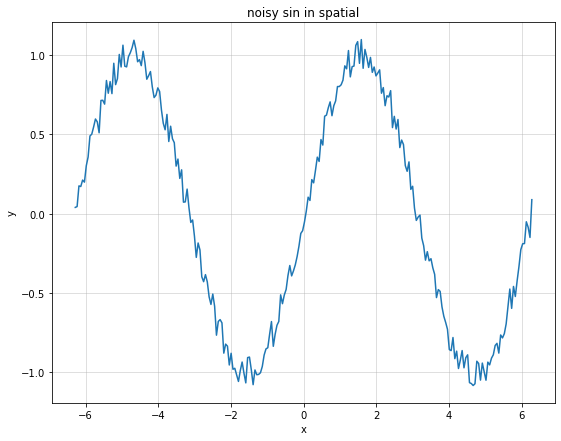

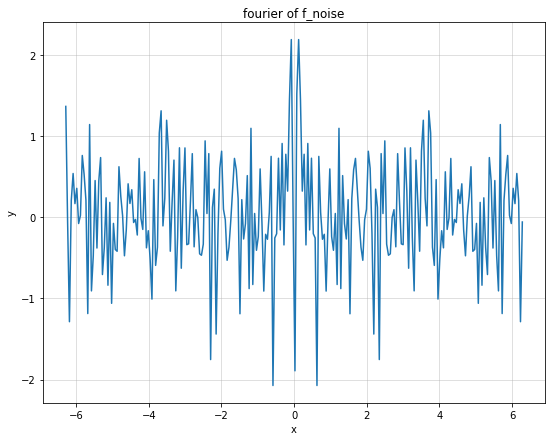

In [8]:
# TODO - plot
plotSpatial(x,f_noise, "noisy sin in spatial")
plotDft(x, discrete_fourier_transform(f_noise), "fourier of f_noise")


   (b) Führen Sie eine Rauschfilterung durch, indem Sie eine Faltung mit einem **Mean-Filter** mit der Fenstergröße 9 im Frequenzraum durchführen.

In [9]:
# w_size = 9
w_size = 4 # fenstergr. von 9 = 4

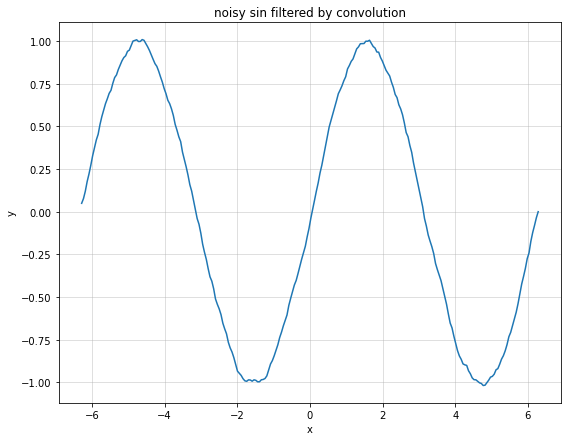

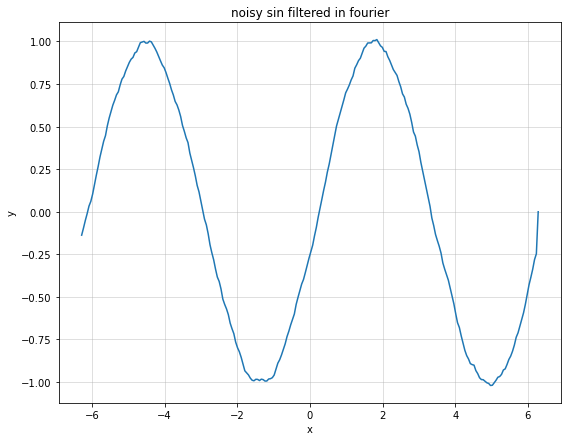

In [10]:
# TODO
def boxcar1D(noisyFunc,w): # is a vec: [-1 0 1] = kernel => w = 1
    result = np.zeros(noisyFunc.shape)
    kernelSize = (w*2)+1

    # handling edges:
    paddedFunc = np.concatenate( (noisyFunc,noisyFunc,noisyFunc) )

    startOfActualFunc = N
    endOfActualFunc = (N*2)-1

    for k in range(startOfActualFunc, endOfActualFunc):
        box = paddedFunc[k-w : k+w+1] # also [k-w ... k ... k+w], +1 weil numpy exklusiv ist
        actualPosOfFunc = k-N
        result[actualPosOfFunc] = np.sum(box)/kernelSize

    return result

filteredConv = boxcar1D(f_noise,w_size)
plotSpatial(x, filteredConv, "noisy sin filtered by convolution")

def boxcar1DWithDFT(noisyFunc, w):
    result = np.zeros(noisyFunc.shape)
    kernelSize = (w*2)+1

    # create box filter as discr. function
    # make box filter fit with data
    # g = [kernel, padding] --> |g| = N
    padding = np.zeros(N-kernelSize)
    kernel = np.ones( kernelSize )/kernelSize
    g = np.concatenate( (kernel, padding) )

    F = discrete_fourier_transform( noisyFunc ) # noisyFunc in fourier space
    G = discrete_fourier_transform( g )         # bosFunc in fourier space
    H = G * F                                   # product of both func. in FS

    result = inverse_discrete_fourier_transform(H)

    return result

filtered = boxcar1DWithDFT(f_noise,w_size)
plotSpatial(x,np.real(filtered), "noisy sin filtered in fourier")

# both results are the same
# -1 leider fehlt der Plot von der Box-Funktion und ihrer DFT

(c) Aufgrund welcher Eigenschaft kann eine Faltung im Frequenzraum durchgeführt werden?

da jede beliebige periodische Funktion sich als Summe von cos und sin Funktionen darstellen laesst
und durch den Faltungssatz eine Faltung in Spatial Space gleich der Multiplikation in Fourier Space
